## 5.5 根據客群制定銷售策略（分群、降維）


### 共通事前處理

In [70]:
# 取得中文字型
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'

--2021-12-14 07:16:16--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2021-12-14 07:16:17--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf.2’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2021-12-14 07:16:1

In [71]:
# 共通事前處理

# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)

# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format

# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)

# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14

# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'

# 隨機種子
random_seed = 183

### 原始連結
Wholesale customers Data Set 

https://archive.ics.uci.edu/ml/datasets/wholesale+customers

### 5.5.4 從載入資料到確認資料

#### 載入資料

In [72]:
# 載入資料
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases\
/00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(url)

# 將項目名稱替換成中文
columns = ['銷售通路', '地區', '生鮮食品', '乳製品', '食品雜貨', 
    '冷凍食品', '清潔劑_家庭用紙', '熟食']
df.columns = columns

#### 確認資料

In [73]:
# 確認資料
display(df.head())

# 確認尺寸
print(df.shape)

,銷售通路,地區,生鮮食品,乳製品,食品雜貨,冷凍食品,清潔劑_家庭用紙,熟食
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)


In [74]:
# 確認缺失值
print(df.isnull().sum())

銷售通路        0
地區          0
生鮮食品        0
乳製品         0
食品雜貨        0
冷凍食品        0
清潔劑_家庭用紙    0
熟食          0
dtype: int64


In [75]:
# 確認銷售通路的標籤值
print(df['銷售通路'].value_counts())
print()

# 確認地區的標籤值
print(df['地區'].value_counts())

1    298
2    142
Name: 銷售通路, dtype: int64

3    316
1     77
2     47
Name: 地區, dtype: int64


#### 銷售通路代碼的含意
1. Horeca（旅館 / 餐廳 / 咖啡廳）298 
2. Retail（零售）142 

#### 地區代碼的含意
1. Lisbon（里斯本）77 
2. Oporto（波爾多）47 
3. Other Region（其他）316 



#### 繪製直方圖

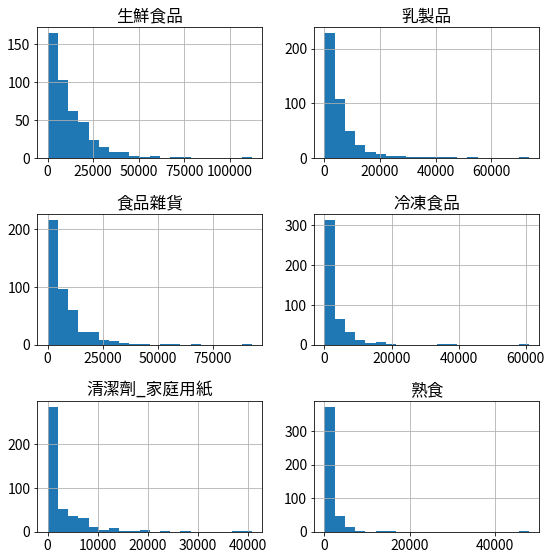

In [76]:
# 將資料中的銷售通路與地區刪除
df2 = df.drop(['銷售通路', '地區'], axis=1)

# 繪製欲分析項目之直方圖
from pylab import rcParams
rcParams['figure.figsize'] = (8, 8)
df2.hist(bins=20)
plt.tight_layout() 
plt.show()

### 5.5.5 執行分群

In [77]:
# 不需預處理資料與分割資料

# 選擇演算法
from sklearn.cluster import KMeans

# 定義群數
clusters=4

# 定義演算法
algorithm = KMeans(n_clusters=clusters, 
    random_state=random_seed)

In [78]:
# 執行訓練與預測
y_pred = algorithm.fit_predict(df2)

# 確認部分結果
print(y_pred[:20])

[3 3 3 3 0 3 3 3 3 1 1 3 0 1 0 3 1 3 3 3]


### 5.5.6 分析分群結果

#### 計算各群的平均值

In [79]:
# 計算各群的平均值
df_cluster = df2.groupby(y_pred).mean()
display(df_cluster)

,生鮮食品,乳製品,食品雜貨,冷凍食品,清潔劑_家庭用紙,熟食
0,36156.3898,6123.6441,6366.7797,6811.1186,1050.0169,3090.0508
1,5134.2198,11398.0769,17848.7582,1562.7802,7768.9231,1900.2418
2,20031.2857,38084.0000,56126.1429,2564.5714,27644.5714,2548.1429
3,8973.3958,3128.0883,3907.4276,2790.2085,1079.2297,1052.5477


#### 繪製各群組的長條圖

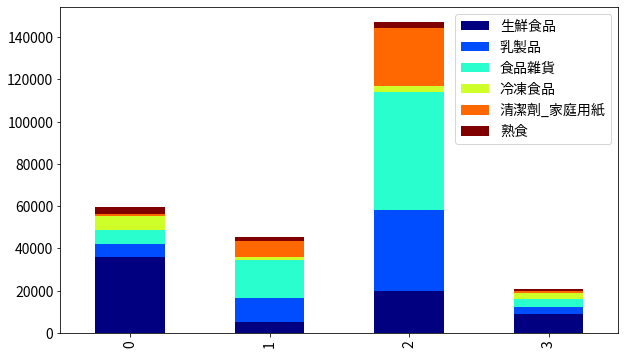

In [80]:
# 繪製各群的長條圖
df_cluster.plot(kind='bar',stacked=True,
    figsize=(10, 6),colormap='jet')
plt.show()

#### 分析結果

* **0**: 以生鮮食品為主
* **1**: 以食品雜貨為主
* **2**: 大量消費
* **3**: 少量消費

#### 群與銷售通路及地區之間的關係

==== 群0 ====


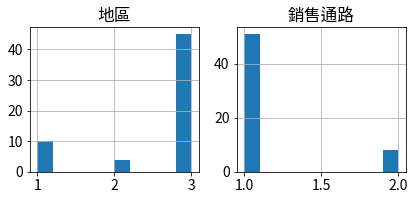

==== 群1 ====


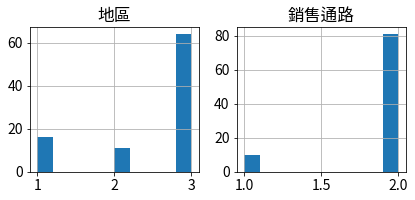

==== 群2 ====


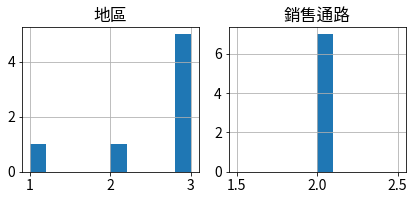

==== 群3 ====


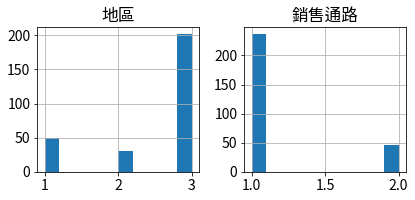

In [81]:
# 確認群與銷售通路和地區之間的關係

# 只提取銷售通路和地區到 df3
df3 = df[['地區', '銷售通路']]

# 設定圖形大小
rcParams['figure.figsize'] = (6,3)

# 繪製各群的圖形
for i in range(clusters):
    fig, ax = plt.subplots()
    w = df3[y_pred==i]
    print(f'==== 群{i} ====')
    w.hist(ax=ax)
    plt.tight_layout()
    plt.show()

#### 分析結果
群0（生鮮）和群3（少量）與銷售通路1（Horeca）有密切相關。   
群1（食雜）和群2 （大量）與銷售通路2（Retail）有密切相關。  
未發現地區和群之間有特殊相關。



```
# This is formatted as code
```

### 5.5.7 執行降維

In [82]:
# 選擇演算法
from sklearn.decomposition import PCA

# 生成模型
# 為繪製散佈圖，降低至 2 維
pca = PCA(n_components=2)

In [83]:
# 執行訓練與轉換
d2 = pca.fit_transform(df2)

# 顯示部分結果
print(d2[:5,:])
#print()
#print(d2.min(axis=0), d2.max(axis=0))

[[  650.0221  1585.5191]
 [-4426.805   4042.4515]
 [-4841.9987  2578.7622]
 [  990.3464 -6279.806 ]
 [10657.9987 -2159.7258]]


### 5.5.8 降維的運用方式

#### 散佈圖顯示

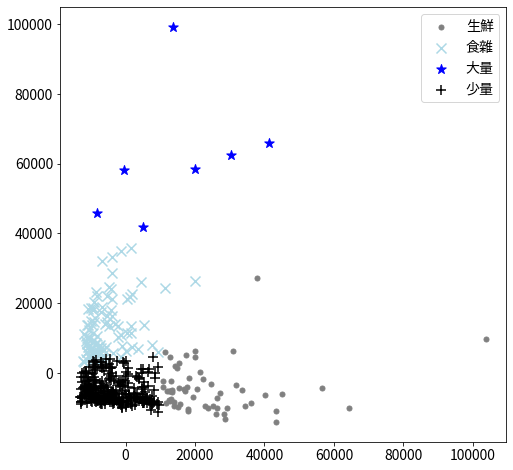

In [84]:
# 繪製以顏色區分各群的散佈圖

plt.figure(figsize=(8,8))
marks = ['.', 'x', '*', '+']
labels = ['生鮮', '食雜', '大量', '少量']
colors = ['grey', 'lightblue', 'blue', 'black']

for i in range(clusters):
  plt.scatter(d2[y_pred==i][:,0], d2[y_pred==i][:,1], 
    marker=marks[i], label=labels[i], s=100, c=colors[i])
plt.legend(fontsize=14)
plt.show()

#### 確認離群值

In [87]:
# 確認生鮮群組的離群值
display(df[d2[:,0] > 100000])

,銷售通路,地區,生鮮食品,乳製品,食品雜貨,冷凍食品,清潔劑_家庭用紙,熟食
181,1,3,112151,29627,18148,16745,4948,8550


【討論】  
索引 181 的消費者在生鮮食品上購買量特別多。

In [88]:
# 確認大量群組的離群值
display(df[d2[:,1] > 80000])

,銷售通路,地區,生鮮食品,乳製品,食品雜貨,冷凍食品,清潔劑_家庭用紙,熟食
85,2,3,16117,46197,92780,1026,40827,2944


【討論】  
索引 85 的消費者在食品與清潔劑、家庭用紙上的購買量特別多。

In [89]:
# 確認統計資訊
display(df2.describe())

,生鮮食品,乳製品,食品雜貨,冷凍食品,清潔劑_家庭用紙,熟食
count,440.0000,440.0000,440.0000,440.0000,440.0000,440.0000
mean,12000.2977,5796.2659,7951.2773,3071.9318,2881.4932,1524.8705
std,12647.3289,7380.3772,9503.1628,4854.6733,4767.8544,2820.1059
min,3.0000,55.0000,3.0000,25.0000,3.0000,3.0000
25%,3127.7500,1533.0000,2153.0000,742.2500,256.7500,408.2500
50%,8504.0000,3627.0000,4755.5000,1526.0000,816.5000,965.5000
75%,16933.7500,7190.2500,10655.7500,3554.2500,3922.0000,1820.2500
max,112151.0000,73498.0000,92780.0000,60869.0000,40827.0000,47943.0000
